Rows: 4803
Columns: 20
Columns:
 Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

Data Types:

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_c

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


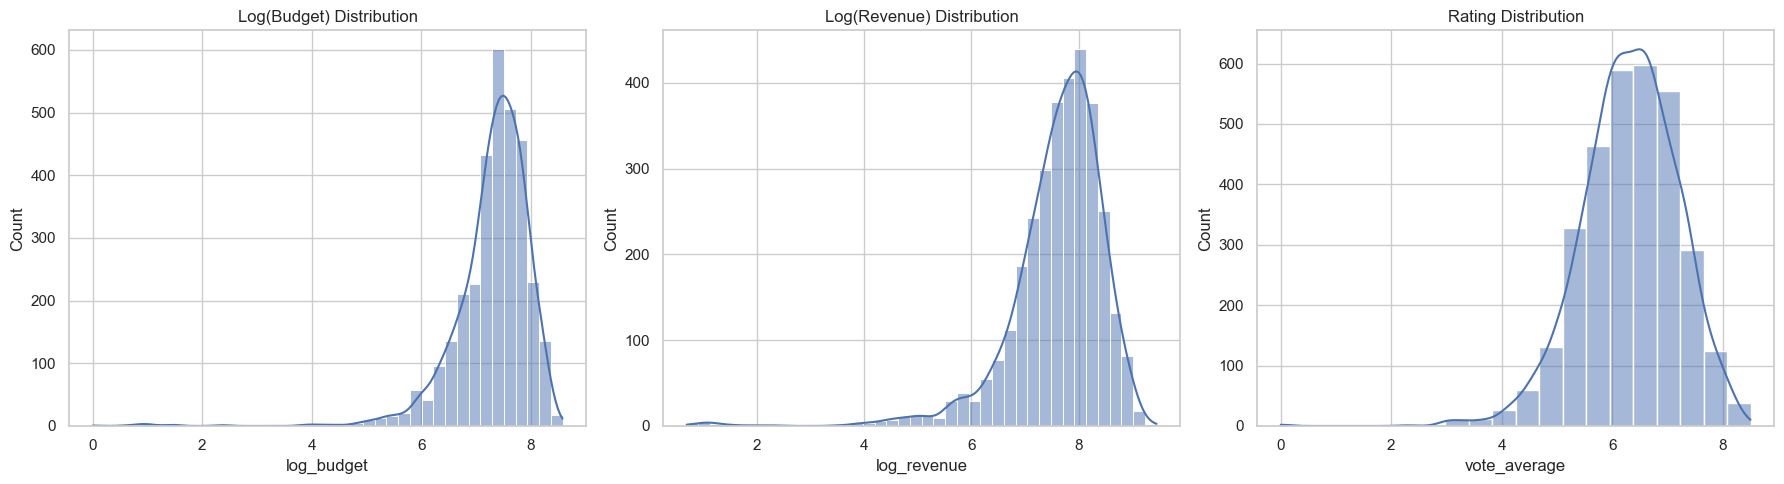

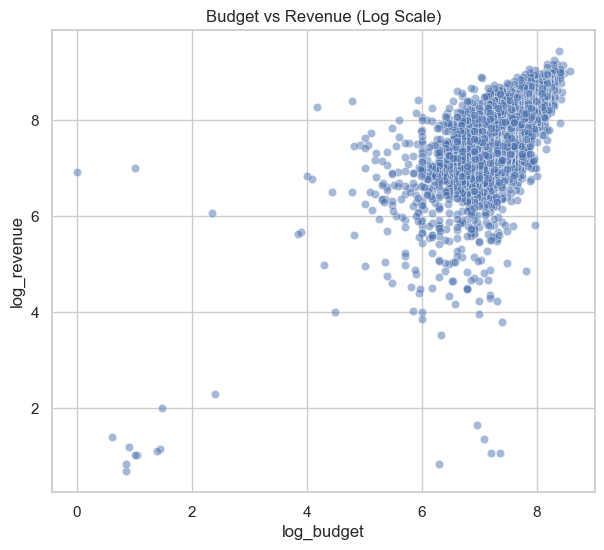

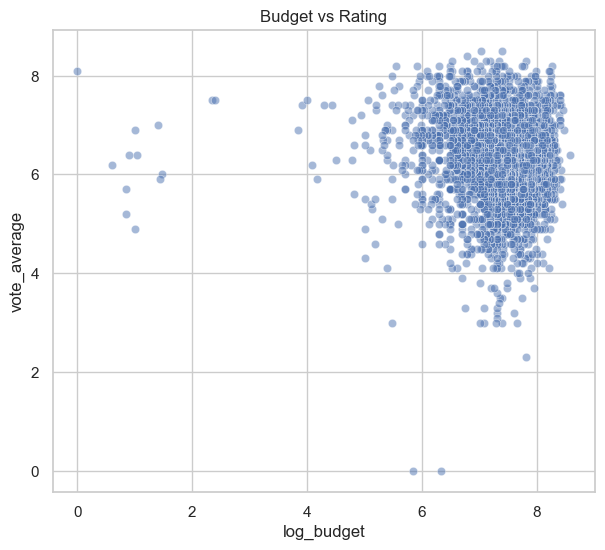

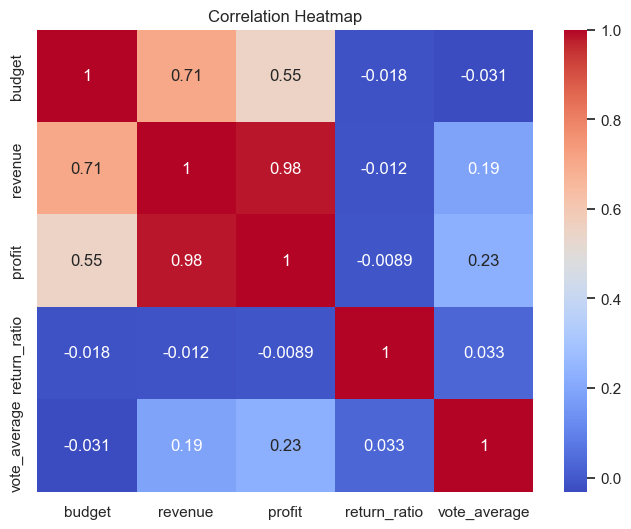

Budget vs Revenue: 0.7053993306781385 (p = 0.0 )
Budget vs Rating : -0.031208274520249966 (p = 0.07620662091415513 )


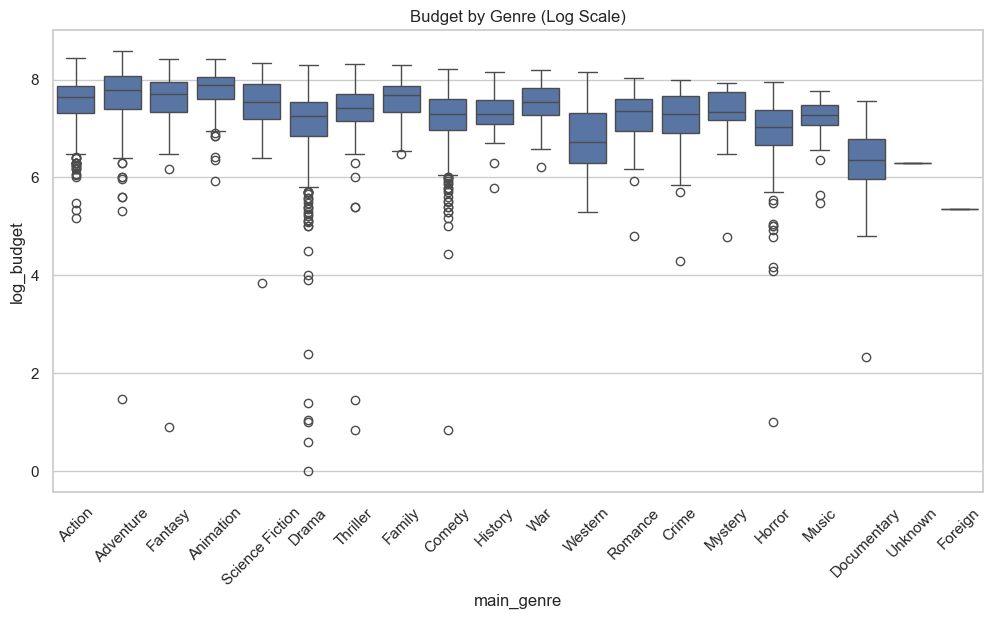

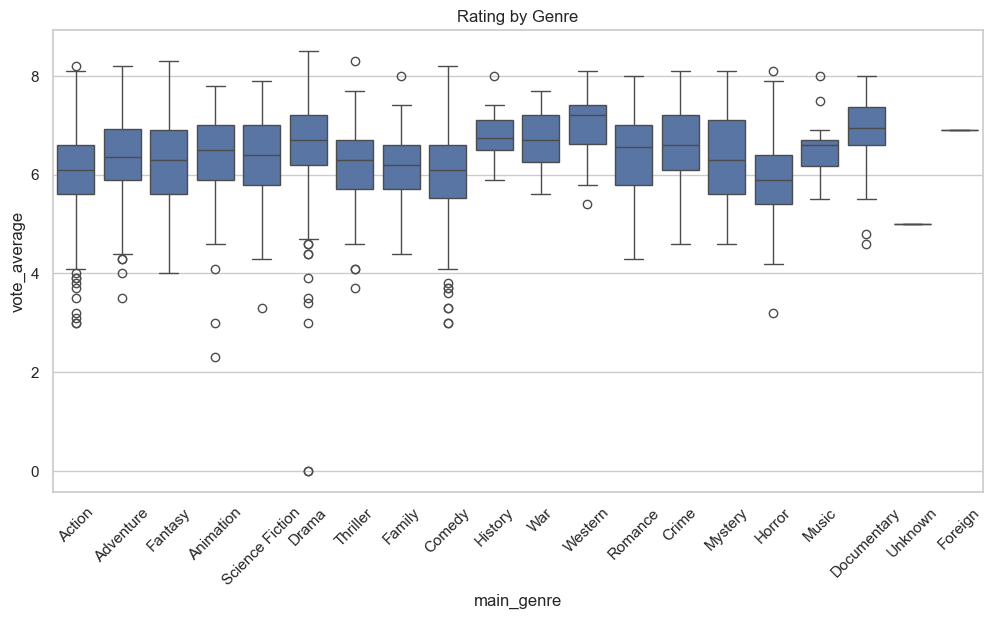

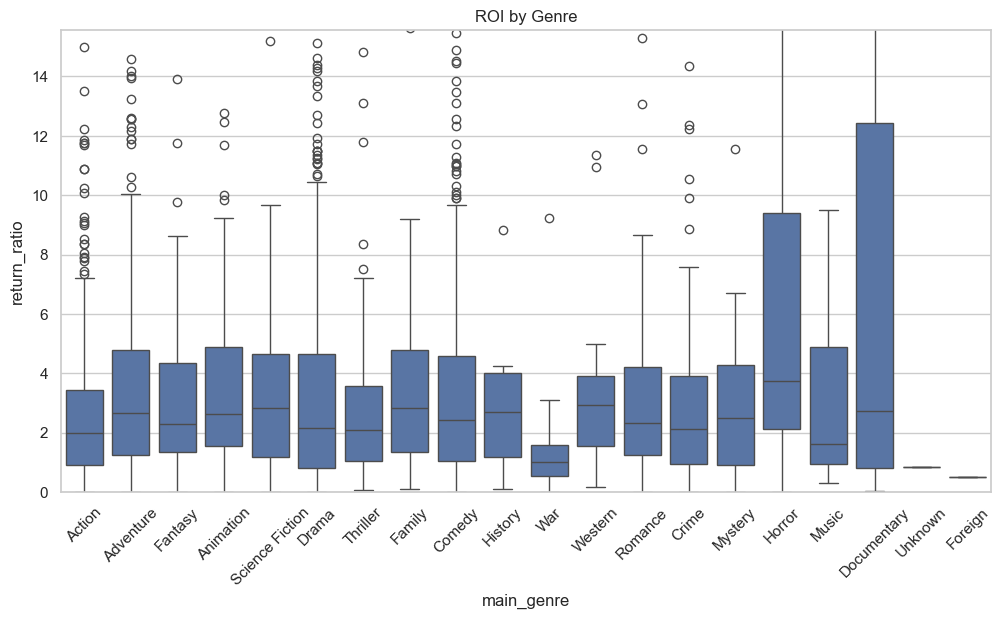

Slope: 2.8616816931980975
Intercept: 4663819.341936722
Train R²: 0.5037073868236885
Test R²: 0.4789882953617246


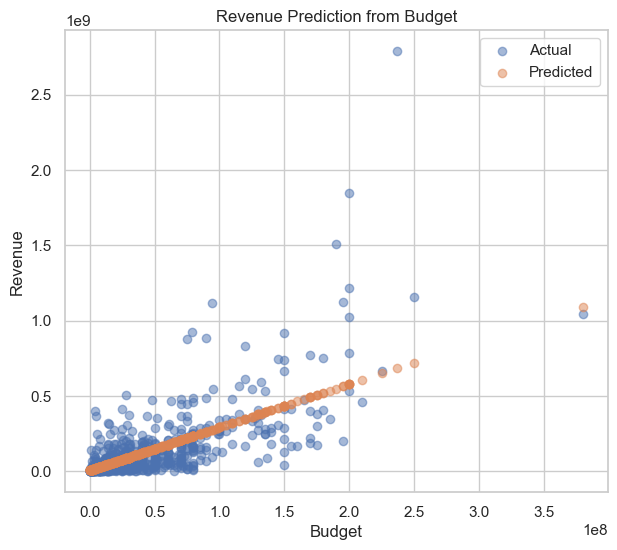

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(style="whitegrid")
tmdb = pd.read_csv("tmdb_5000_movies.csv")

print("Rows:", tmdb.shape[0])
print("Columns:", tmdb.shape[1])
tmdb.head()
print("Columns:\n", tmdb.columns)
print("\nData Types:\n")
print(tmdb.dtypes)

tmdb.describe(include="all").T
tmdb = tmdb.drop_duplicates()

tmdb['budget'] = pd.to_numeric(tmdb['budget'], errors='coerce')
tmdb['revenue'] = pd.to_numeric(tmdb['revenue'], errors='coerce')

tmdb = tmdb.dropna(subset=['budget', 'revenue', 'vote_average'])

tmdb = tmdb[(tmdb['budget'] > 0) & (tmdb['revenue'] > 0)]

tmdb['profit'] = tmdb['revenue'] - tmdb['budget']
tmdb['return_ratio'] = tmdb['revenue'] / tmdb['budget']

tmdb[['budget','revenue','profit','return_ratio','vote_average']].head()
tmdb['log_budget'] = np.log10(tmdb['budget'])
tmdb['log_revenue'] = np.log10(tmdb['revenue'])
tmdb['log_profit'] = np.log10(tmdb['profit'] + 1)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(tmdb['log_budget'], bins=40, kde=True, ax=axes[0])
axes[0].set_title("Log(Budget) Distribution")

sns.histplot(tmdb['log_revenue'], bins=40, kde=True, ax=axes[1])
axes[1].set_title("Log(Revenue) Distribution")

sns.histplot(tmdb['vote_average'], bins=20, kde=True, ax=axes[2])
axes[2].set_title("Rating Distribution")

plt.tight_layout()
plt.show()
plt.figure(figsize=(7,6))
sns.scatterplot(x='log_budget', y='log_revenue', data=tmdb, alpha=0.5)
plt.title("Budget vs Revenue (Log Scale)")
plt.show()

plt.figure(figsize=(7,6))
sns.scatterplot(x='log_budget', y='vote_average', data=tmdb, alpha=0.5)
plt.title("Budget vs Rating")
plt.show()
num_cols = ['budget','revenue','profit','return_ratio','vote_average']
corr = tmdb[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

corr
corr_budget_rev, p_budget_rev = pearsonr(tmdb['budget'], tmdb['revenue'])
corr_budget_rating, p_budget_rating = pearsonr(tmdb['budget'], tmdb['vote_average'])

print("Budget vs Revenue:", corr_budget_rev, "(p =", p_budget_rev, ")")
print("Budget vs Rating :", corr_budget_rating, "(p =", p_budget_rating, ")")
import ast

def extract_genre(s):
    try:
        g = ast.literal_eval(s)
        if isinstance(g, list) and len(g) > 0:
            return g[0].get("name", "Unknown")
        return "Unknown"
    except:
        return "Unknown"

tmdb["main_genre"] = tmdb["genres"].apply(extract_genre)
tmdb["main_genre"].value_counts().head()
plt.figure(figsize=(12,6))
sns.boxplot(data=tmdb, x='main_genre', y='log_budget')
plt.xticks(rotation=45)
plt.title("Budget by Genre (Log Scale)")
plt.show()
plt.figure(figsize=(12,6))
sns.boxplot(data=tmdb, x='main_genre', y='vote_average')
plt.xticks(rotation=45)
plt.title("Rating by Genre")
plt.show()
plt.figure(figsize=(12,6))
sns.boxplot(data=tmdb, x='main_genre', y='return_ratio')
plt.ylim(0, tmdb['return_ratio'].quantile(0.95))
plt.xticks(rotation=45)
plt.title("ROI by Genre")
plt.show()
X = tmdb[['budget']]
y = tmdb['revenue']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)
print("Train R²:", model.score(X_train, y_train))
print("Test R²:", model.score(X_test, y_test))
y_pred = model.predict(X_test)

plt.figure(figsize=(7,6))
plt.scatter(X_test, y_test, alpha=0.5, label="Actual")
plt.scatter(X_test, y_pred, alpha=0.5, label="Predicted")
plt.title("Revenue Prediction from Budget")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.legend()
plt.show()



In [25]:
import os
os.listdir()


['.config',
 'Music',
 '.condarc',
 '.DS_Store',
 'DSA-210-codes.ipynb',
 '.CFUserTextEncoding',
 '.xonshrc',
 '.teroshdl2_prj.json',
 'anaconda_projects',
 '.zshrc',
 '.local',
 'Pictures',
 '.zprofile',
 '.digital.cfg',
 '.zsh_history',
 '.ipython',
 'Desktop',
 'Library',
 '.matplotlib',
 'DataGripProjects',
 'Public',
 'OneDrive - sabanciuniv.edu',
 '.tcshrc',
 'tmdb_5000_movies.csv',
 '.anaconda',
 '.ssh',
 'Movies',
 'Applications',
 '.Trash',
 '.ipynb_checkpoints',
 '.jupyter',
 'Documents',
 '.vscode',
 '.bash_profile',
 '.swiftpm',
 'Downloads',
 '.continuum',
 '.gitconfig',
 '.zsh_sessions',
 '.conda']